### Atividade 1
Criação das features: Computar o Term Frequency-Inverse Document Frequency (TF-IDF) para representar a importância das palavras em um conjunto de documentos.

### Atividade 2
Modelagem de K-Nearest Neighbors (KNN): Criar modelos simples de classificação utilizando a base de dados codificada por TF-IDF.
- Explore diferentes valores para o parâmetro K do KNN e analise seu impacto nos resultados obtidos (através da acurácia do modelo para os dados de validação).


### Atividade 3
Avaliação de Modelos: Aplicar técnicas de validação cruzada para estimar a eficiência dos modelos desenvolvidos.

### Atividade 4
Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos.

### Atividade 5
Baseado nos valores encontrados para as diferentes figuras de mérito, interprete os resultados e disserte sobre a eficiência do classificador criado.

TF-IDF: (18898, 100)
Palavras mais relevantes: ['000' '2016' 'according' 'administration' 'america' 'american' 'asked'
 'called' 'campaign' 'china' 'city' 'clinton' 'committee' 'congress'
 'country' 'court' 'day' 'democratic' 'democrats' 'department']

Variando valores de k para KNN:
k = 1	acurácia: 0.8835978835978836
k = 2	acurácia: 0.8510582010582011
k = 3	acurácia: 0.8917989417989418
k = 4	acurácia: 0.8783068783068783
k = 5	acurácia: 0.8912698412698413
k = 6	acurácia: 0.8801587301587301
k = 7	acurácia: 0.8917989417989418
k = 8	acurácia: 0.8854497354497355
k = 9	acurácia: 0.8936507936507937
k = 10	acurácia: 0.8899470899470899
k = 11	acurácia: 0.8925925925925926
k = 12	acurácia: 0.8896825396825396
k = 13	acurácia: 0.8973544973544973
k = 14	acurácia: 0.8931216931216931
k = 15	acurácia: 0.8992063492063492
k = 16	acurácia: 0.8941798941798942
k = 17	acurácia: 0.8997354497354497
k = 18	acurácia: 0.894973544973545
k = 19	acurácia: 0.897089947089947
k = 20	acurácia: 0.8962962962962963
k = 21

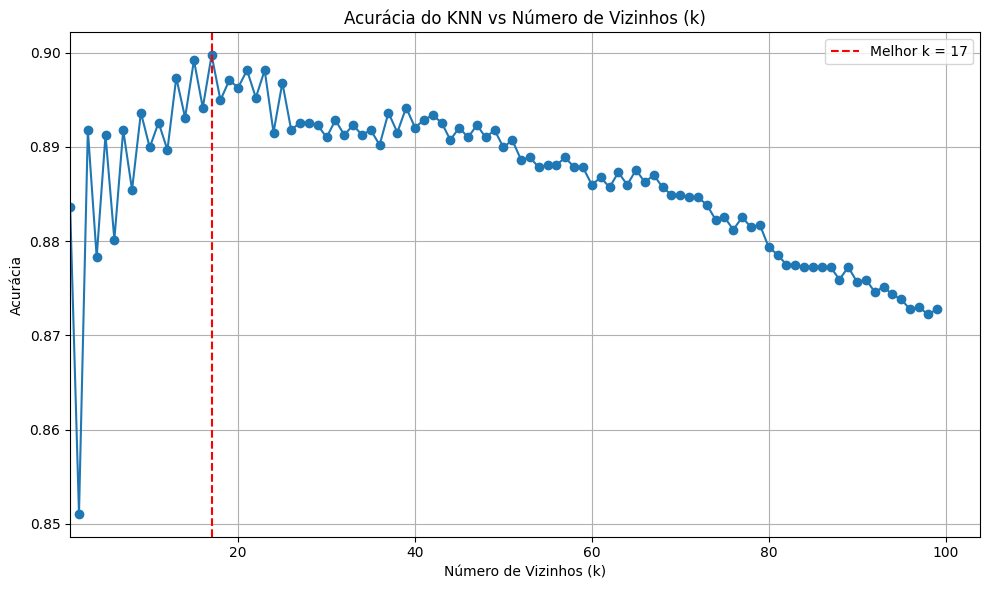

Melhor resultado:
k = 17	acurácia: 0.8997354497354497

Validação cruzada (utilizando melhor k encontrado anteriormente, k=17):
Acurácias por fold: [0.89777778 0.88518519 0.81777778 0.8462963  0.87703704 0.88921823
 0.86105965]
Média da acurácia: 0.8677645649672326


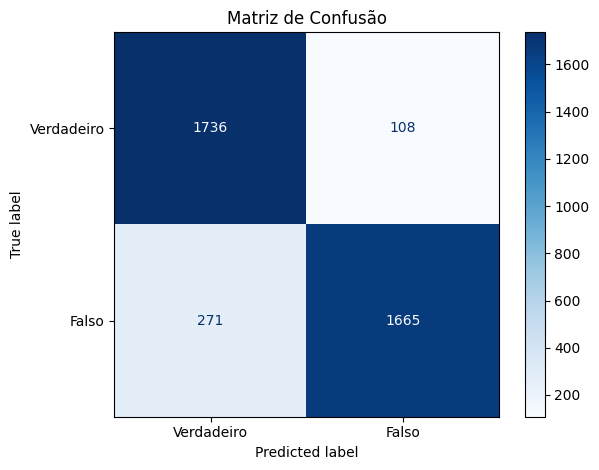


Métricas
Precisão:       0.9390862944162437
Recall:         0.8600206611570248
F1-Score:       0.8978161229441898
AUC-ROC:        0.9638501180957675
Especificidade: 0.9414316702819957


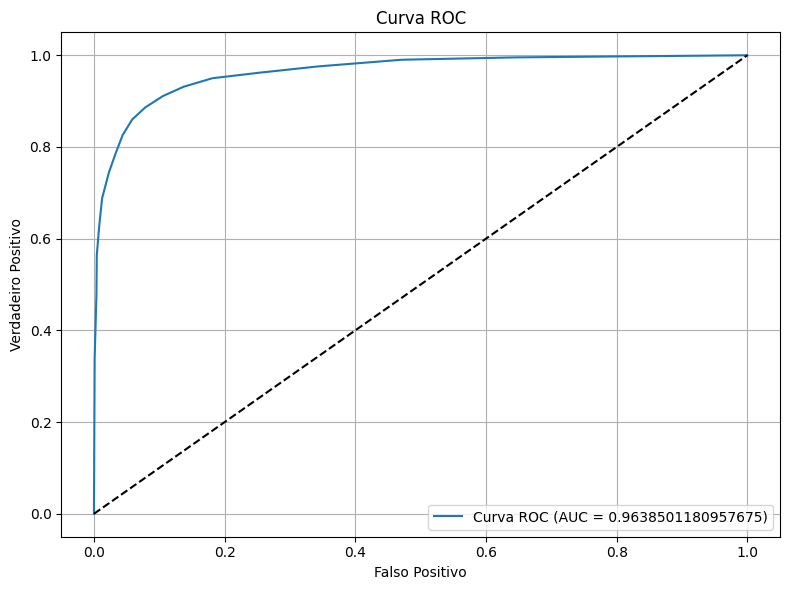

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

# Ler arquivo de textos verdadeiros
df_true = pd.read_csv("True.csv", header=None)
df_true["fake"] = 0

# Ler arquivo de textos falsos
df_fake = pd.read_csv("Fake.csv", header=None)
df_fake["fake"] = 1

# Concatenar em um DataFrame
df_text = pd.concat([df_true, df_fake], ignore_index=True)
df_text.columns = ["resumo", "texto", "contexto", "data", "fake"]


# *************************************************************
# ***                      ATIVIDADE 1                      ***
# *************************************************************

# TF-IDF da coluna "texto"
vectorizer = TfidfVectorizer(stop_words="english", max_features=100)

# Transformar os textos em vetores TF-IDF
features_tfidf = vectorizer.fit_transform(df_text["texto"])

print("TF-IDF:", features_tfidf.shape)
print("Palavras mais relevantes:", vectorizer.get_feature_names_out()[:20])


# *************************************************************
# ***                      ATIVIDADE 2                      ***
# *************************************************************
ALEATORIO = 11

# Separar em treino e teste
feature_train, feature_test, target_train, target_test = train_test_split(features_tfidf, df_text["fake"], test_size=0.2, random_state=ALEATORIO)

melhor_resultado = (0, 0)
resultados = []
valores_k = range(1, 100)

# Variando valores de k
print("\nVariando valores de k para KNN:")
for k in valores_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(feature_train, target_train)
    target_pred_knn = knn.predict(feature_test)
    accuracy = accuracy_score(target_test, target_pred_knn)
    resultados.append(accuracy)
    print(f"k = {k}\tacurácia: {accuracy}")
    if accuracy > melhor_resultado[1]:
        melhor_resultado = (k, accuracy)

# Gerar gráfico
plt.figure(figsize=(10, 6))
plt.plot(valores_k, resultados, marker="o")
plt.title("Acurácia do KNN vs Número de Vizinhos (k)")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.axvline(x=melhor_resultado[0], color="red", linestyle="--", label=f"Melhor k = {melhor_resultado[0]}")
plt.legend()
plt.xlim(left=1)
plt.tight_layout()
plt.show()

print("Melhor resultado:")
print(f"k = {melhor_resultado[0]}\tacurácia: {melhor_resultado[1]}")


# *************************************************************
# ***                      ATIVIDADE 3                      ***
# *************************************************************
# Modelo KNN com melhor k
melhor_k = melhor_resultado[0]
knn = KNeighborsClassifier(n_neighbors=melhor_k)

# Aplicar validação cruzada com 7 folds
scores = cross_val_score(knn, features_tfidf, df_text["fake"], cv=7, scoring="accuracy")
print(f"\nValidação cruzada (utilizando melhor k encontrado anteriormente, k={melhor_k}):")
print("Acurácias por fold:", scores)
print("Média da acurácia:", np.mean(scores))


# *************************************************************
# ***                      ATIVIDADE 4                      ***
# *************************************************************
knn = KNeighborsClassifier(n_neighbors=melhor_k)
knn.fit(feature_train, target_train)

# Previsões
target_pred = knn.predict(feature_test)
target_proba = knn.predict_proba(feature_test)[:, 1]

# Métricas
precision = precision_score(target_test, target_pred)
recall = recall_score(target_test, target_pred)
f1 = f1_score(target_test, target_pred)
roc_auc = roc_auc_score(target_test, target_proba)

# Curva ROC
fpr, tpr, thresholds = roc_curve(target_test, target_proba)

# Matriz de confusão
cm = confusion_matrix(target_test, target_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = recall
specificity = tn / (tn + fp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Verdadeiro", "Falso"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão")
plt.grid(False)
plt.tight_layout()
plt.show()

# Exibir métricas
print("\nMétricas")
print(f"Precisão:       {precision}")
print(f"Recall:         {recall}")
print(f"F1-Score:       {f1}")
print(f"AUC-ROC:        {roc_auc}")
print(f"Especificidade: {specificity}")

# Plotar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
# Variando número de features
melhor_resultado = (0, 0, 0)
for n_features in range(100, 5000, 100):
    vectorizer = TfidfVectorizer(stop_words="english", max_features=n_features)
    features_tfidf = vectorizer.fit_transform(df_text["texto"])
    feature_train, feature_test, target_train, target_test = train_test_split(features_tfidf, df_text["fake"], test_size=0.2, random_state=ALEATORIO)

    valores_k = range(1, 100)
    for k in valores_k:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(feature_train, target_train)
        target_pred_knn = knn.predict(feature_test)
        accuracy = accuracy_score(target_test, target_pred_knn)
        print(f"k = {k}\tacurácia: {accuracy}\tnúmero de features: {n_features}")
        if accuracy > melhor_resultado[1]:
            melhor_resultado = (k, accuracy, n_features)
            print(f"** k = {melhor_resultado[0]}\tacurácia: {melhor_resultado[1]}\tnúmero de features: {melhor_resultado[2]} **")

print("Melhor resultado:")
print(f"k = {melhor_resultado[0]}\tacurácia: {melhor_resultado[1]}\tnúmero de features: {melhor_resultado[2]}")


k = 1	acurácia: 0.8835978835978836	número de features: 100
** k = 1	acurácia: 0.8835978835978836	número de features: 100 **
k = 2	acurácia: 0.8510582010582011	número de features: 100
k = 3	acurácia: 0.8917989417989418	número de features: 100
** k = 3	acurácia: 0.8917989417989418	número de features: 100 **
k = 4	acurácia: 0.8783068783068783	número de features: 100
k = 5	acurácia: 0.8912698412698413	número de features: 100
k = 6	acurácia: 0.8801587301587301	número de features: 100
k = 7	acurácia: 0.8917989417989418	número de features: 100
k = 8	acurácia: 0.8854497354497355	número de features: 100
k = 9	acurácia: 0.8936507936507937	número de features: 100
** k = 9	acurácia: 0.8936507936507937	número de features: 100 **
k = 10	acurácia: 0.8899470899470899	número de features: 100
k = 11	acurácia: 0.8925925925925926	número de features: 100
k = 12	acurácia: 0.8896825396825396	número de features: 100
k = 13	acurácia: 0.8973544973544973	número de features: 100
** k = 13	acurácia: 0.897354497354